In [1]:
import pandas as pd
import numpy as np


Since the training and test data sets have already been separated, I've already imported them

In [7]:
train = pd.read_csv('C:\\Users\\arnia\\Desktop\\Kaggle\\Digit Recognizer\\train.csv')
test = pd.read_csv('C:\\Users\\arnia\\Desktop\\Kaggle\\Digit Recognizer\\test.csv')

print(train.head())
print('No of rows: ',len(train))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

When observing the columns, there seems to be a lot of columns with a 0 pixel-value. A 0 value shouldn't have no influence in labeling a picture. In order to remove the noise from the signal, it's best to remove those columns with an entire 0 pixel-value.

In [5]:
data_cols=[]

# go through each column and only extract non-zero pixel values
for col in train.columns:
    if train[col].sum() == 0:
        continue
    else:
        data_cols.append(col)
   
# only look at numerical data columns
num_train = train.loc[:,data_cols]
num_test = test.loc[:,data_cols[1:]]


As the data set contains more rows (images) than columns (pixel values) and the number of fields for this data set is large, it's best to train a Random Forest Classifier in order to label each image. When looking at the dimensions of the data, I first started out with 50 trees to begin with.

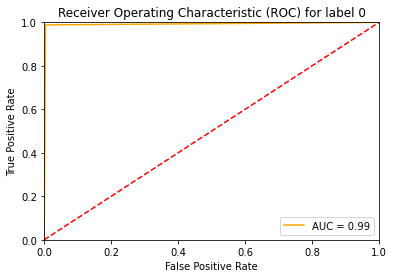

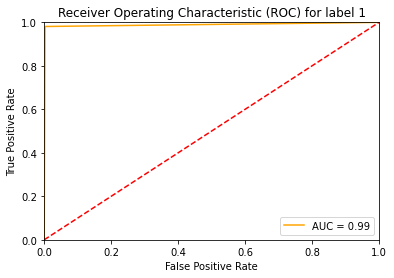

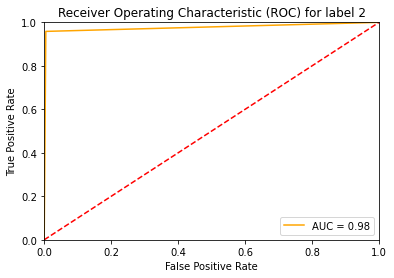

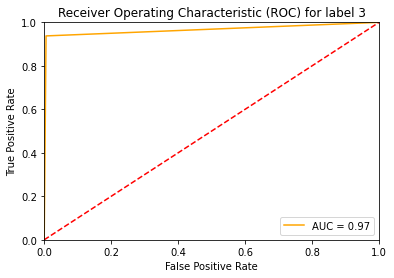

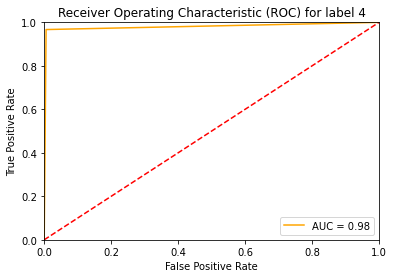

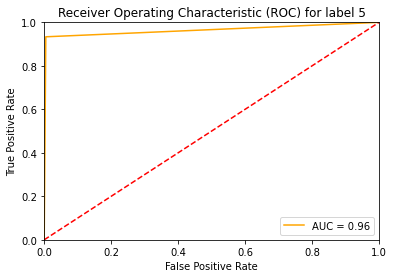

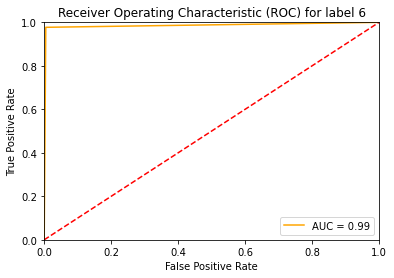

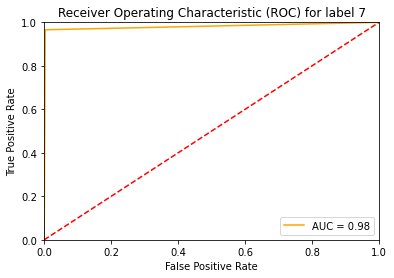

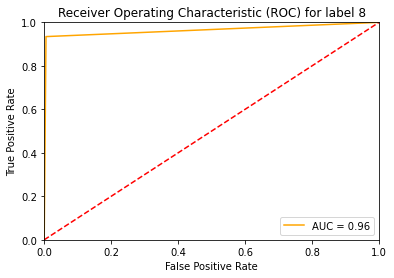

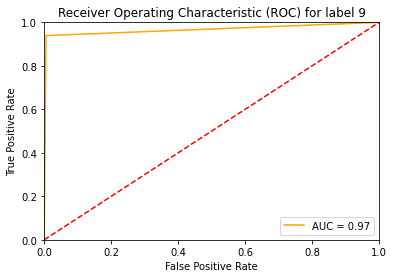

In [8]:
# split the dataset as 70% training and 30% test data and segregate the "label" column
import sklearn.model_selection as ms
idx = ms.train_test_split(num_train,test_size=round(len(num_train)*0.3))

x_train = idx[0]; y_train = x_train.iloc[:,0]; x_train = x_train.iloc[:,1:]
x_test = idx[1]; y_test = x_test.iloc[:,0]; x_test = x_test.iloc[:,1:]

# train the Random Forest Classifier with 50 trees
from sklearn.ensemble import RandomForestClassifier
np.random.seed(len(x_train))
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train, y_train)

# get the labels/scores from the supervised algorithm
scores = rf_clf.predict(x_test)

# plot the ROC curve and get the auc value for each label
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
def plot_auc(y_test, y_pred):
    ## Compute the false positive rate, true positive rate and threshold along with the AUC
    labels = np.sort(np.unique(y_test))
    aucs = pd.DataFrame(columns=['label','auc']); aucs['label']=labels
    for label in labels:
        
        y_true = [1 if x==label else 0 for x in y_test]
        y_mod = [1 if x==label else 0 for x in y_pred]
        fpr, tpr, threshold = sklm.roc_curve(y_true, y_mod)
        auc = sklm.auc(fpr, tpr)
        aucs.loc[label,'auc'] = auc
        
        ## Plot the result
        plt.title('Receiver Operating Characteristic (ROC) for label '+ str(label))
        plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    return aucs
    
aucs = plot_auc(y_test, scores)

The auc value for each label is greater than or equal to 0.96. This indicates a highly successful supervised, machine learning algorithm and is very useful in classifying images given the current model and training data. Thus, there is no need to conduct and bagging or boosting or Xgboost methods to improve the efficiency of the model as originally the model is very successful in classifying images. I also got the accuracy score as well.

In [9]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])    

print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1261                 0
Actual negative         0              1342

Accuracy  0.96
 
           Positive      Negative
Num case     1276          1368
Precision    0.97          0.98
Recall       0.99          0.98
F1           0.98          0.98


The accuracy score is consistent with the each auc score as shown above. In conclusion, the given training and test data set using the Random Forest Classifier produces a highly efficent supervised, learning algorihm that can label images given the pixel-values. This machine learning model was used to classify the given pixelated-values using the test data set.